In [10]:
import pandas as pd

# 엑셀 파일 경로 설정
file_path = '../raw/5_용접불량율.xlsx'

# 엑셀 파일 객체 생성 및 시트 병합 (첫 번째 시트 제외)
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
all_data = pd.DataFrame()

for sheet in sheet_names[1:]:  # 첫 번째 시트 제외
    sheet_data = pd.read_excel(file_path, sheet_name=sheet)
    all_data = pd.concat([all_data, sheet_data], ignore_index=True)

# 로드한 데이터 확인
print("데이터 프레임 형태:", all_data.shape)
print("컬럼 이름들:", all_data.columns)
print(all_data.head())

데이터 프레임 형태: (24299, 21)
컬럼 이름들: Index(['프로젝트', '선종', '선종.1', '업체구분', '검사길이', '불량길이', '검사방법', '검사자ID', '과',
       '검사실적입력일', 'NDE업체', '용도판정', '사유코드', '사유코드 설명', '직반장사번', '직반장성명',
       '직반장 Vendor 코드', '용접사사번', '용접사성명', '용접완료일', '용접방법'],
      dtype='object')
  프로젝트   선종 선종.1    업체구분   검사길이  불량길이 검사방법       검사자ID   과    검사실적입력일  ...  \
0  P31  LNG    B  Vendor  600.0   NaN  초음파  ID00000002  D1 2023-03-31  ...   
1  P31  LNG    B  Vendor  600.0   NaN  초음파  ID00000002  D1 2023-03-31  ...   
2  P31  LNG    B  Vendor  600.0   NaN  초음파  ID00000002  D1 2023-03-31  ...   
3  P31  LNG    B  Vendor  600.0   NaN  초음파  ID00000002  D1 2023-03-31  ...   
4  P31  LNG    B  Vendor  600.0   NaN  초음파  ID00000002  D1 2023-03-31  ...   

  용도판정 사유코드 사유코드 설명    직반장사번 직반장성명 직반장 Vendor 코드    용접사사번 용접사성명      용접완료일  \
0   승인  NaN     NaN  A000002   고*선            V1  W000002   김*철 2023-02-11   
1   승인  NaN     NaN  A000002   고*선            V1  W000002   김*철 2023-02-11   
2   승인  NaN     NaN  A000002   고*선  

In [11]:
# 결측치 확인
missing_values = all_data.isnull().sum()
print("결측치 개수:\n", missing_values)

# 데이터 타입 확인
print("데이터 타입:\n", all_data.dtypes)

# 전체 데이터 통계 요약
print("데이터 요약:\n", all_data.describe(include='all'))

결측치 개수:
 프로젝트                 0
선종                   0
선종.1                 0
업체구분                 0
검사길이                 0
불량길이             24151
검사방법                 0
검사자ID                0
과                    0
검사실적입력일              0
NDE업체                0
용도판정                 0
사유코드             24151
사유코드 설명          24151
직반장사번                0
직반장성명                0
직반장 Vendor 코드     6714
용접사사번                0
용접사성명                0
용접완료일                0
용접방법                 0
dtype: int64
데이터 타입:
 프로젝트                     object
선종                       object
선종.1                     object
업체구분                     object
검사길이                    float64
불량길이                    float64
검사방법                     object
검사자ID                    object
과                        object
검사실적입력일          datetime64[ns]
NDE업체                    object
용도판정                     object
사유코드                     object
사유코드 설명                  object
직반장사번                    object
직반장성명 

In [12]:
# 데이터 복사
data_cleaned = all_data.copy()

# 결측치가 있는 다른 열은 적절한 값으로 채움 ('불량길이', '사유코드', '사유코드 설명' 예시)
null_columns = ['불량길이', '사유코드', '사유코드 설명']
for col in null_columns:
    data_cleaned[col] = data_cleaned[col].fillna('해당없음')

# '직반장 Vendor 코드' 결측치를 '직영'으로 채우기
data_cleaned['직반장 Vendor 코드'] = data_cleaned['직반장 Vendor 코드'].fillna('직영')

# 결측치 처리 후 확인
missing_values_after_cleaning = data_cleaned.isnull().sum()
print("결측치 처리 후 개수:\n", missing_values_after_cleaning)

결측치 처리 후 개수:
 프로젝트             0
선종               0
선종.1             0
업체구분             0
검사길이             0
불량길이             0
검사방법             0
검사자ID            0
과                0
검사실적입력일          0
NDE업체            0
용도판정             0
사유코드             0
사유코드 설명          0
직반장사번            0
직반장성명            0
직반장 Vendor 코드    0
용접사사번            0
용접사성명            0
용접완료일            0
용접방법             0
dtype: int64


In [13]:
data_cleaned['검사실적입력일'] = pd.to_datetime(data_cleaned['검사실적입력일'], errors='coerce')
data_cleaned['용접완료일'] = pd.to_datetime(data_cleaned['용접완료일'], errors='coerce')

In [14]:
import os

# 폴더 생성
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')

# 전처리된 데이터 저장
data_cleaned.to_csv('processed_data/processed_data_5.csv', index=False)

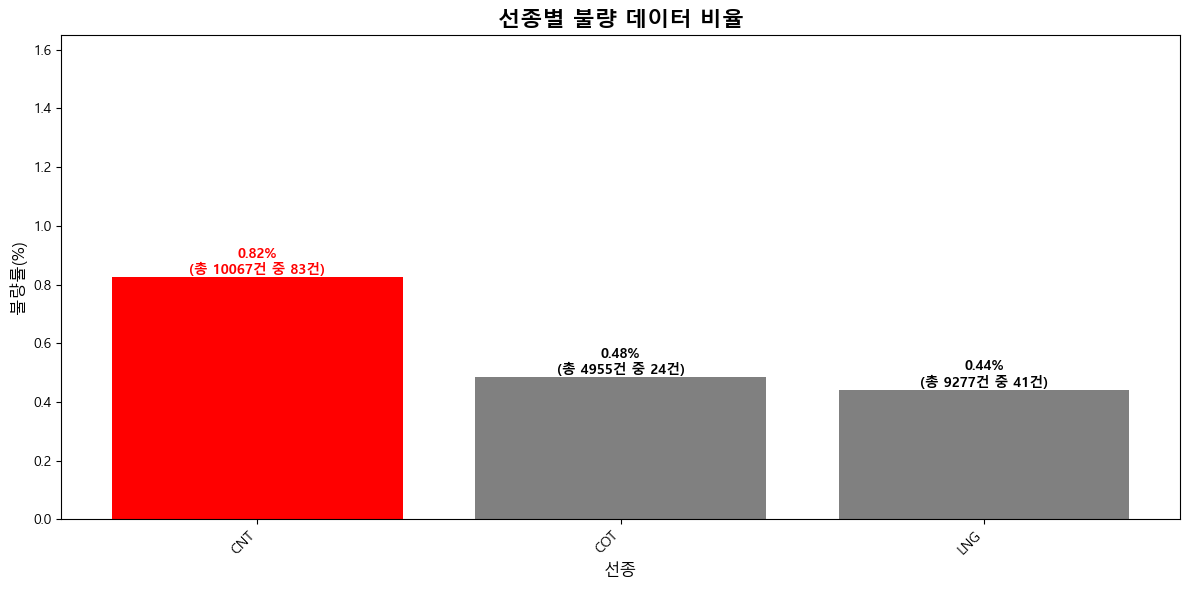

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 불량 데이터의 조건 설정 (예: 불량길이가 0보다 큰 경우)
data_cleaned['불량길이'] = pd.to_numeric(data_cleaned['불량길이'], errors='coerce')
defective_data = data_cleaned[data_cleaned['불량길이'] > 0]

# 선종별 총 데이터 개수
total_by_ship_type = data_cleaned.groupby('선종').size()

# 선종별 불량 데이터 개수
defective_by_ship_type = defective_data.groupby('선종').size()

# 불량 데이터 비율 계산
ship_type_defect_rate = (defective_by_ship_type / total_by_ship_type) * 100
ship_type_defect_rate = ship_type_defect_rate.fillna(0)  # NaN이 발생한 경우 0으로 대체

# 불량률이 가장 높은 선종 찾기
max_defect_rate = ship_type_defect_rate.max()

# 시각화
plt.figure(figsize=(12, 6))

# 막대 그래프 그리기
bars = plt.bar(ship_type_defect_rate.index, ship_type_defect_rate.values, 
               color=['red' if rate == max_defect_rate else 'gray' for rate in ship_type_defect_rate.values])

# 값 레이블 추가
for i, (ship_type, rate) in enumerate(ship_type_defect_rate.items()):
    defect_count = defective_by_ship_type.get(ship_type, 0)
    total_count = total_by_ship_type.get(ship_type, 0)
    label_color = 'red' if rate == max_defect_rate else 'black'
    plt.text(i, rate, f'{rate:.2f}%\n(총 {total_count}건 중 {defect_count}건)', 
             ha='center', va='bottom', fontweight='bold', color=label_color)

plt.title('선종별 불량 데이터 비율', fontsize=16, fontweight='bold')
plt.xlabel('선종', fontsize=12)
plt.ylabel('불량률(%)', fontsize=12)
plt.ylim(0, min(5,max_defect_rate*2))  # y축 범위를 0에서 10으로 설정
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

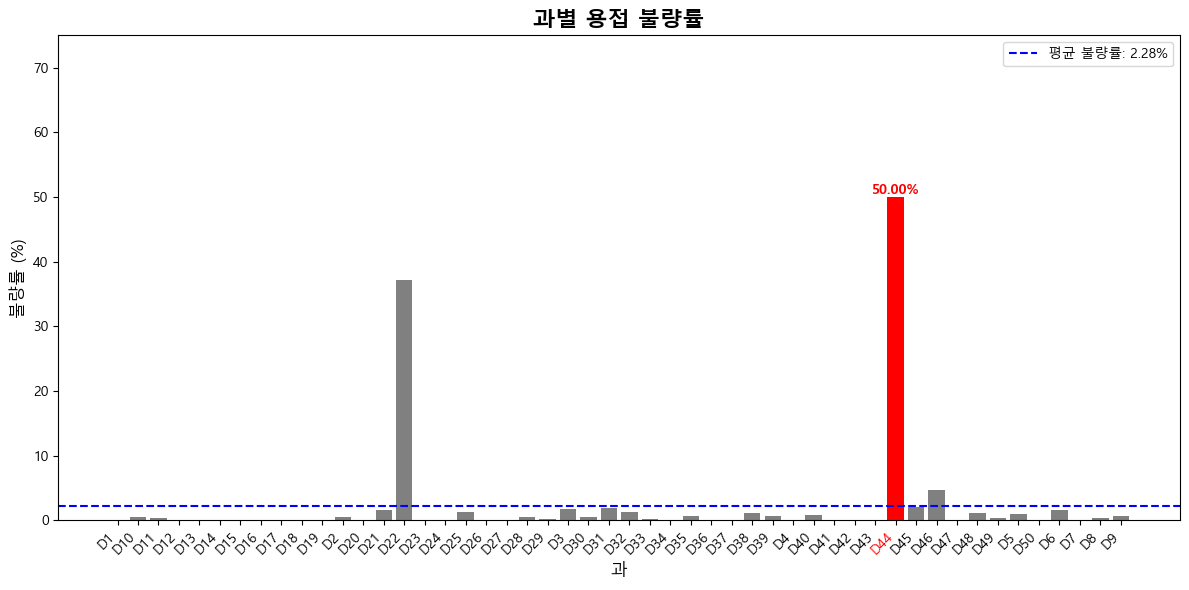

평균 불량률: 2.28%
최대 불량률을 가진 과: D44 (50.00%)


In [28]:
# 불량 여부 추가 (불량길이가 0보다 큰 경우 불량으로 간주)
data_cleaned['불량여부'] = data_cleaned['불량길이'] > 0

# 과별 전체 데이터 개수 및 불량 데이터 개수 계산
group_by_dept = data_cleaned.groupby('과').agg(전체건수=('불량여부', 'size'), 불량건수=('불량여부', 'sum')).reset_index()

# 과별 불량률 계산
group_by_dept['불량률'] = (group_by_dept['불량건수'] / group_by_dept['전체건수']) * 100

# 평균 불량률 계산
average_defect_rate = group_by_dept['불량률'].mean()

# 최대 불량률을 가진 과 찾기
max_defect_dept = group_by_dept.loc[group_by_dept['불량률'].idxmax()]

# 시각화
plt.figure(figsize=(12, 6))

# 색상 설정
colors = ['red' if dept == max_defect_dept['과'] else 'gray' for dept in group_by_dept['과']]

# 막대 그래프 그리기
bars = plt.bar(group_by_dept['과'], group_by_dept['불량률'], color=colors)

# 최대 불량률을 가진 과에 대해 값 레이블 추가
for bar in bars:
    if bar.get_height() == max_defect_dept['불량률']:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f"{bar.get_height():.2f}%", 
                 ha='center', va='bottom', color='red', fontweight='bold')

plt.xlabel('과', fontsize=12)
plt.ylabel('불량률 (%)', fontsize=12)
plt.title('과별 용접 불량률', fontsize=16, fontweight='bold')
# x축 레이블 색상 변경
x_ticks = plt.gca().get_xticklabels()
for i, tick in enumerate(x_ticks):
    if group_by_dept['과'].iloc[i] == max_defect_dept['과']:
        tick.set_color('red')
plt.xticks(rotation=45, ha='right')

# y축 범위 설정
plt.ylim(0, max_defect_dept['불량률'] * 1.5)

# 평균 불량률 선 추가
plt.axhline(y=average_defect_rate, color='blue', linestyle='--', label=f'평균 불량률: {average_defect_rate:.2f}%')

plt.legend()
plt.tight_layout()
plt.show()

# 결과 출력
print(f"평균 불량률: {average_defect_rate:.2f}%")
print(f"최대 불량률을 가진 과: {max_defect_dept['과']} ({max_defect_dept['불량률']:.2f}%)")

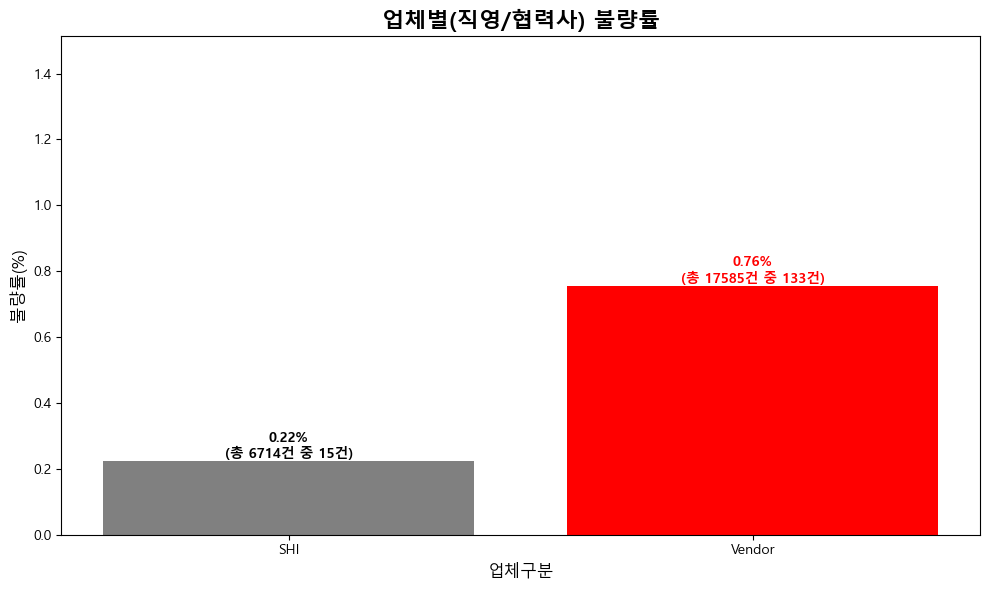


업체별 불량률:
SHI: 0.22% (총 6714건 중 15건)
Vendor: 0.76% (총 17585건 중 133건)


In [16]:
# 불량 데이터의 조건 설정
data_cleaned['불량길이'] = pd.to_numeric(data_cleaned['불량길이'], errors='coerce')
defective_data = data_cleaned[data_cleaned['불량길이'] > 0]

# 업체별 총 데이터 개수
total_by_vendor = data_cleaned.groupby('업체구분').size()

# 업체별 불량 데이터 개수
defective_by_vendor = defective_data.groupby('업체구분').size()

# 불량 데이터 비율 계산
vendor_defect_rate = (defective_by_vendor / total_by_vendor) * 100
vendor_defect_rate = vendor_defect_rate.fillna(0)  # NaN이 발생한 경우 0으로 대체

# 불량률이 가장 높은 업체 찾기
max_defect_rate = vendor_defect_rate.max()

# 시각화
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
bars = plt.bar(vendor_defect_rate.index, vendor_defect_rate.values, 
               color=['red' if rate == max_defect_rate else 'gray' for rate in vendor_defect_rate.values])

# 값 레이블 추가
for i, (vendor, rate) in enumerate(vendor_defect_rate.items()):
    defect_count = defective_by_vendor.get(vendor, 0)
    total_count = total_by_vendor.get(vendor, 0)
    label_color = 'red' if rate == max_defect_rate else 'black'
    plt.text(i, rate, f'{rate:.2f}%\n(총 {total_count}건 중 {defect_count}건)', 
             ha='center', va='bottom', fontweight='bold', color=label_color)

plt.title('업체별(직영/협력사) 불량률', fontsize=16, fontweight='bold')
plt.xlabel('업체구분', fontsize=12)
plt.ylabel('불량률(%)', fontsize=12)
plt.ylim(0, min(5, max_defect_rate * 2))  # y축 범위를 0에서 5까지 또는 최대 불량률의 110%로 설정
plt.xticks(rotation=0)  # 업체 구분이 짧으므로 회전 없이 표시
plt.tight_layout()
plt.show()

# 불량률 출력
print("\n업체별 불량률:")
for vendor, rate in vendor_defect_rate.items():
    defect_count = defective_by_vendor.get(vendor, 0)
    total_count = total_by_vendor.get(vendor, 0)
    print(f"{vendor}: {rate:.2f}% (총 {total_count}건 중 {defect_count}건)")

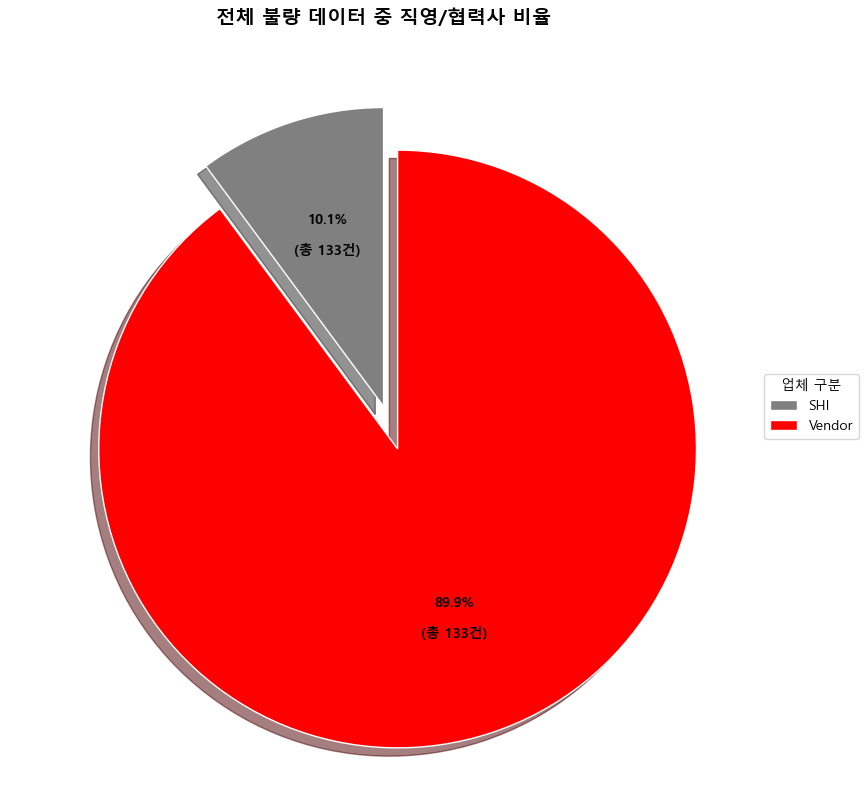

In [17]:
# 불량 데이터의 조건 설정
data_cleaned['불량길이'] = pd.to_numeric(data_cleaned['불량길이'], errors='coerce')
defective_data = data_cleaned[data_cleaned['불량길이'] > 0]

# 업체별 불량 데이터 개수
defective_by_vendor = defective_data.groupby('업체구분').size()

# 전체 불량 데이터에서 각 업체가 차지하는 비율 계산
vendor_defect_ratio = defective_by_vendor / defective_by_vendor.sum() * 100

# 불량 비율이 더 높은 업체 찾기
max_ratio_vendor = vendor_defect_ratio.idxmax()

# 색상 설정
colors = ['red' if vendor == max_ratio_vendor else 'gray' for vendor in vendor_defect_ratio.index]

# 시각화
plt.figure(figsize=(10, 8))

# 원형 그래프 그리기
wedges, texts, autotexts = plt.pie(vendor_defect_ratio.values, 
                                   labels=None,
                                   autopct=f'%1.1f%%\n\n(총 {defective_by_vendor[vendor]}건)',
                                   startangle=90,
                                   colors=colors,
                                   explode=[0.15 if vendor == max_ratio_vendor else 0 for vendor in vendor_defect_ratio.index],
                                   shadow=True,
                                   wedgeprops={'edgecolor': 'white'})

# 폰트 설정
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

# 제목 설정
plt.title('전체 불량 데이터 중 직영/협력사 비율', fontsize=14, fontweight='bold')

# 범례 추가
plt.legend(wedges, [f"{vendor}" for vendor in vendor_defect_ratio.index],
           title="업체 구분",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

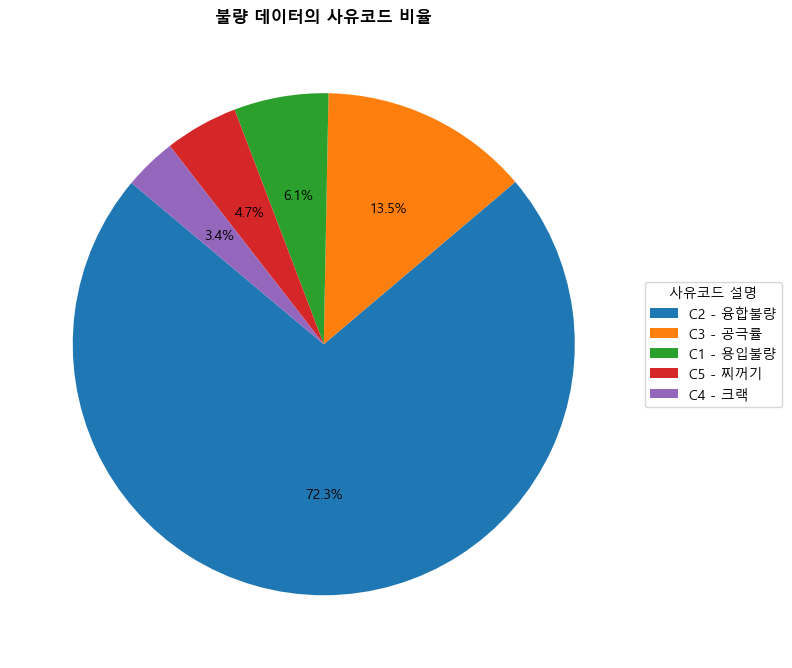

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 불량 데이터 필터링 (불량길이가 존재하는 데이터만)
defective_data = data_cleaned[data_cleaned['불량길이'] > 0]

# 각 사유코드별 데이터 개수
reason_code_counts = defective_data['사유코드'].value_counts()
reason_code_labels = defective_data[['사유코드', '사유코드 설명']].drop_duplicates().set_index('사유코드')['사유코드 설명']

# 원형 그래프
plt.figure(figsize=(8, 8))
colors = sns.color_palette('tab10', len(reason_code_counts))
wedges, texts, autotexts = plt.pie(reason_code_counts, labels=None, autopct='%1.1f%%', colors=colors, startangle=140)

# 범례 생성
legend_labels = [f"{label} - {reason_code_labels[label]}" for label in reason_code_counts.index]
plt.legend(wedges, legend_labels, title="사유코드 설명", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('불량 데이터의 사유코드 비율', fontweight='bold')
plt.tight_layout()
plt.show()


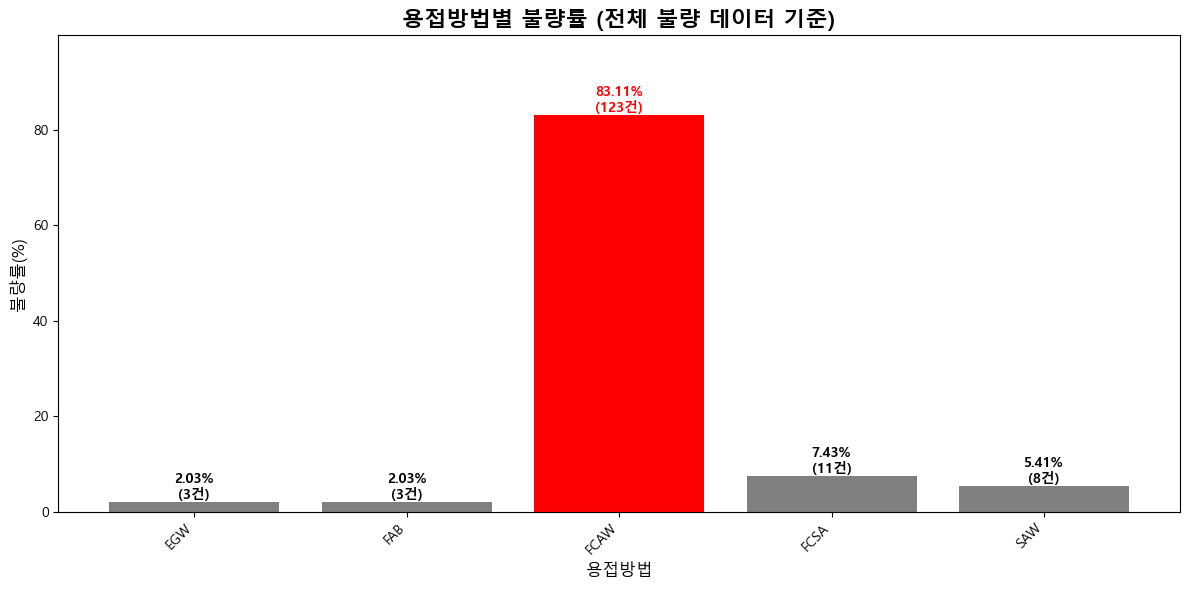


용접방법별 불량률 (전체 불량 데이터 기준):
EGW: 2.03% (3건)
FAB: 2.03% (3건)
FCAW: 83.11% (123건)
FCSA: 7.43% (11건)
SAW: 5.41% (8건)


In [20]:
# 불량 데이터 필터링 (불량길이가 존재하는 데이터)
data_cleaned['불량길이'] = pd.to_numeric(data_cleaned['불량길이'], errors='coerce')
defective_data = data_cleaned[data_cleaned['불량길이'] > 0]

# 용접방법별 불량 데이터 개수
defective_by_welding_method = defective_data.groupby('용접방법').size()

# 전체 불량 데이터에서 각 용접방법이 차지하는 비율 계산
welding_method_defect_rate = (defective_by_welding_method / defective_by_welding_method.sum()) * 100

# 불량률이 가장 높은 용접방법 찾기
max_defect_rate = welding_method_defect_rate.max()

# 시각화
plt.figure(figsize=(12, 6))

# 막대 그래프 그리기
bars = plt.bar(welding_method_defect_rate.index, welding_method_defect_rate.values, 
               color=['red' if rate == max_defect_rate else 'gray' for rate in welding_method_defect_rate.values])

# 값 레이블 추가
for i, (method, rate) in enumerate(welding_method_defect_rate.items()):
    defect_count = defective_by_welding_method.get(method, 0)
    label_color = 'red' if rate == max_defect_rate else 'black'
    plt.text(i, rate, f'{rate:.2f}%\n({defect_count}건)', 
             ha='center', va='bottom', fontweight='bold', color=label_color)

plt.title('용접방법별 불량률 (전체 불량 데이터 기준)', fontsize=16, fontweight='bold')
plt.xlabel('용접방법', fontsize=12)
plt.ylabel('불량률(%)', fontsize=12)
plt.ylim(0, max(welding_method_defect_rate.values) * 1.2)  # y축 범위 설정
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 불량률 출력
print("\n용접방법별 불량률 (전체 불량 데이터 기준):")
for method, rate in welding_method_defect_rate.items():
    defect_count = defective_by_welding_method.get(method, 0)
    print(f"{method}: {rate:.2f}% ({defect_count}건)")

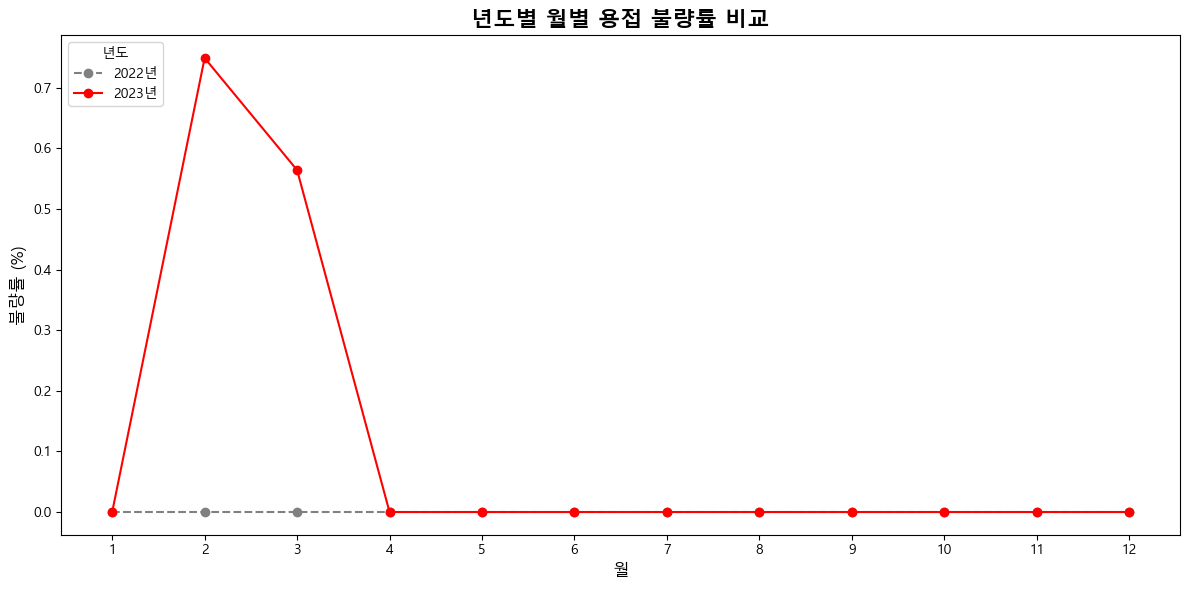


2022년 월별 불량률:
1월: 0.00% (전체 0건 중 0건 불량)
2월: 0.00% (전체 0건 중 0건 불량)
3월: 0.00% (전체 0건 중 0건 불량)
4월: 0.00% (전체 0건 중 0건 불량)
5월: 0.00% (전체 0건 중 0건 불량)
6월: 0.00% (전체 0건 중 0건 불량)
7월: 0.00% (전체 0건 중 0건 불량)
8월: 0.00% (전체 0건 중 0건 불량)
9월: 0.00% (전체 4건 중 0건 불량)
10월: 0.00% (전체 0건 중 0건 불량)
11월: 0.00% (전체 1건 중 0건 불량)
12월: 0.00% (전체 12건 중 0건 불량)

2023년 월별 불량률:
1월: 0.00% (전체 127건 중 0건 불량)
2월: 0.75% (전체 6410건 중 48건 불량)
3월: 0.56% (전체 17730건 중 100건 불량)
4월: 0.00% (전체 15건 중 0건 불량)
5월: 0.00% (전체 0건 중 0건 불량)
6월: 0.00% (전체 0건 중 0건 불량)
7월: 0.00% (전체 0건 중 0건 불량)
8월: 0.00% (전체 0건 중 0건 불량)
9월: 0.00% (전체 0건 중 0건 불량)
10월: 0.00% (전체 0건 중 0건 불량)
11월: 0.00% (전체 0건 중 0건 불량)
12월: 0.00% (전체 0건 중 0건 불량)


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 불량 데이터 필터링 (불량길이가 존재하는 데이터)
data_cleaned['불량길이'] = pd.to_numeric(data_cleaned['불량길이'], errors='coerce')
data_cleaned['불량여부'] = data_cleaned['불량길이'] > 0

# 년도와 월 추출
data_cleaned['년도'] = data_cleaned['용접완료일'].dt.year
data_cleaned['월'] = data_cleaned['용접완료일'].dt.month

# 년도별, 월별 전체 데이터 수와 불량 데이터 수 계산
monthly_data = data_cleaned.groupby(['년도', '월']).agg({
    '불량여부': ['count', 'sum']
}).reset_index()

monthly_data.columns = ['년도', '월', '전체건수', '불량건수']

# 불량률 계산
monthly_data['불량률'] = (monthly_data['불량건수'] / monthly_data['전체건수']) * 100

# 모든 월을 포함하여 데이터 재구성
all_months = pd.MultiIndex.from_product([monthly_data['년도'].unique(), range(1, 13)], names=['년도', '월'])
monthly_data = monthly_data.set_index(['년도', '월']).reindex(all_months).fillna(0).reset_index()

# 최신 연도 추출
latest_year = monthly_data['년도'].max()

# 시각화
plt.figure(figsize=(12, 6))

# 월에 대한 x축 설정
months = list(range(1, 13))  # 1월부터 12월까지

# 각 년도별로 선 그래프 그리기
for year in sorted(monthly_data['년도'].unique()):
    year_data = monthly_data[monthly_data['년도'] == year]
    
    if year == latest_year:
        plt.plot(year_data['월'], year_data['불량률'], label=f'{year}년', color='red', marker='o')
    else:
        plt.plot(year_data['월'], year_data['불량률'], label=f'{year}년', color='gray', linestyle='--', marker='o')

# 그래프 레이블 및 제목 설정
plt.title('년도별 월별 용접 불량률 비교', fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('불량률 (%)', fontsize=12)
plt.xticks(months)  # x축 월 표시
plt.legend(title='년도', loc='upper left')
plt.tight_layout()
plt.show()

# 년도별, 월별 불량률 출력
for year in sorted(monthly_data['년도'].unique()):
    print(f"\n{year}년 월별 불량률:")
    year_data = monthly_data[monthly_data['년도'] == year]
    for _, row in year_data.iterrows():
        print(f"{int(row['월'])}월: {row['불량률']:.2f}% (전체 {int(row['전체건수'])}건 중 {int(row['불량건수'])}건 불량)")

c:\Users\user\.conda\envs\work\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\user\.conda\envs\work\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


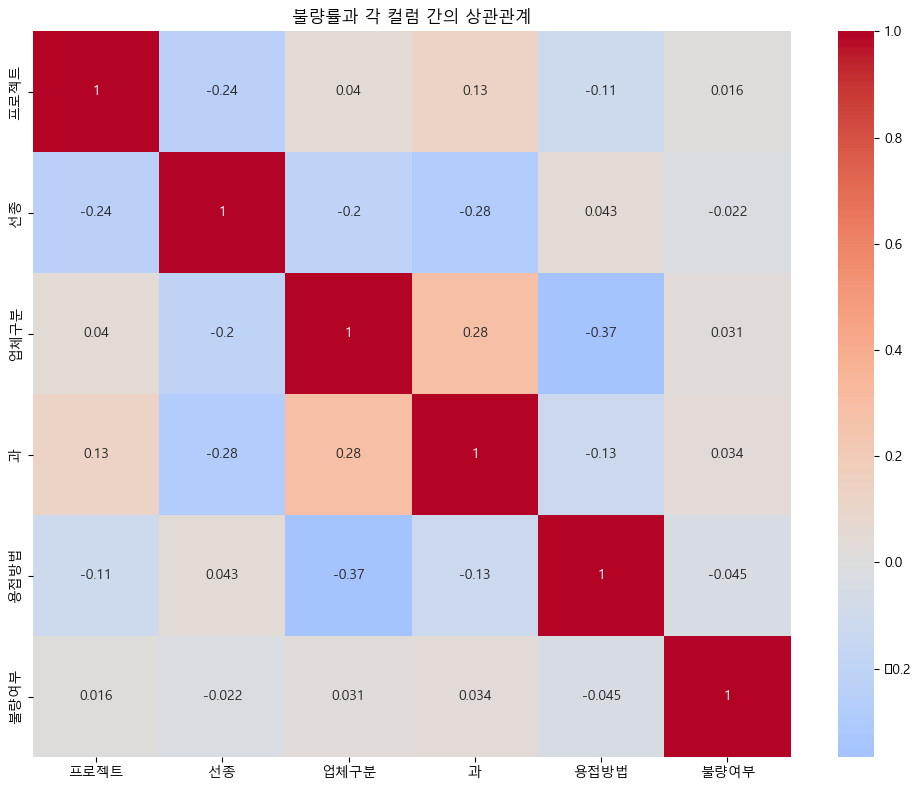

In [32]:
from sklearn.preprocessing import LabelEncoder

# 데이터 전처리: 범주형 변수를 숫자로 변환
label_encoder = LabelEncoder()
data_cleaned['불량여부'] = data_cleaned['불량여부'].astype(int)  # 1: 불량, 0: 정상

# 불량률 계산을 위한 컬럼 변환
cols_to_analyze = ['프로젝트', '선종', '업체구분', '과', '용접방법']
for col in cols_to_analyze:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col].astype(str))

# 상관계수 행렬 계산
correlation_matrix = data_cleaned[cols_to_analyze + ['불량여부']].corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('불량률과 각 컬럼 간의 상관관계')
plt.tight_layout()
plt.show()